<a href="https://colab.research.google.com/github/gulabpatel/Statistics/blob/main/08%3A%20Non_Linear_Relationship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Video walkthrough of the code : https://www.youtube.com/watch?v=3HqdLc09DFY

Dataset : https://github.com/gulabpatel/Statistics/tree/main/Dataset

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
loan_df = pd.read_csv('/content/drive/MyDrive/dataset/loan_analysis_summary.csv')
loan_df.sample(10)

,fico_score,loan_total,default_total,dti,avg_loan_amnt,median_annual_inc,avg_annual_inc,int_rate,default_rate,actual_default_rate
18,680,37968,3918,19.088208,13607.44969,64000,75615.08576,13.362121,3.032320,0.640402
8,580,11723,8004,20.742532,15020.67517,62000,73070.84885,14.791581,6.194663,1.308264
15,650,17249,2310,19.222320,13144.41852,62000,74223.04512,13.750977,1.787815,0.377573
1,510,8223,7191,19.747810,13889.67226,56000,65446.52263,15.440212,5.565445,1.175378
22,720,37891,1024,18.534565,14937.35848,68000,80257.22532,11.849898,0.792521,0.167374
25,750,23225,298,17.818053,15285.38859,69400,81545.86262,10.836394,0.230636,0.048708
20,700,40425,2027,19.027558,14434.50711,65000,78835.67874,12.641587,1.568788,0.331316
29,790,12844,92,17.470487,15706.57116,70000,81104.11345,9.542079,0.071203,0.015038
26,760,19593,230,17.653180,15343.85878,68000,80241.66723,10.547044,0.178008,0.037594
5,550,12817,10164,20.788260,14864.66412,60000,70157.60817,15.048212,7.866386,1.661319


In [4]:
loan_df[['fico_score', 'loan_total']].corr('spearman')

,fico_score,loan_total
fico_score,1.000000,0.043243
loan_total,0.043243,1.000000


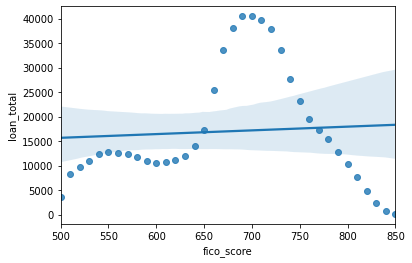

In [5]:
sns.regplot(x='fico_score', y='loan_total', data=loan_df)

<function matplotlib.pyplot.show>

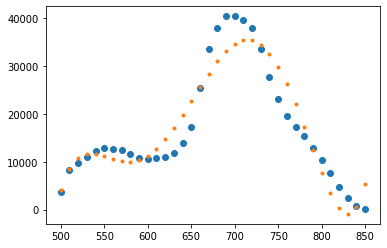

In [6]:
coeff = np.poly1d(np.polyfit(loan_df['fico_score'], loan_df['loan_total'],5))
coeff
t = loan_df['fico_score']
plt.plot(loan_df['fico_score'], loan_df['loan_total'],'o', t,coeff(t), '.')
plt.show

In [7]:
coeff

poly1d([ 6.00037793e-07, -1.99259784e-03,  2.61951319e+00, -1.70446336e+03,
        5.49180402e+05, -7.01232540e+07])

In [8]:
loan_df[['dti','loan_total']].corr('spearman')

,dti,loan_total
dti,1.000000,0.029344
loan_total,0.029344,1.000000


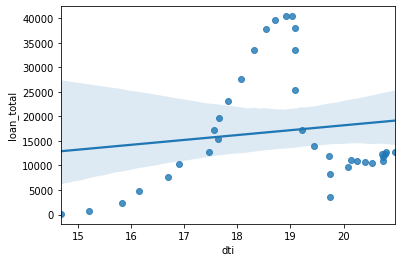

In [9]:
sns.regplot(x='dti', y='loan_total', data=loan_df)

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [11]:
polynomial_features = PolynomialFeatures(degree=4)
x_poly = polynomial_features.fit_transform(loan_df[['dti']])

In [12]:
model = LinearRegression()
model.fit(x_poly, loan_df['loan_total'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
y_pred = model.predict(x_poly)

In [14]:
model.coef_

array([ 0.00000000e+00, -1.33678762e+07,  1.11964965e+06, -4.13729904e+04,
        5.69311839e+02])

In [15]:
model.intercept_

59406562.586883076

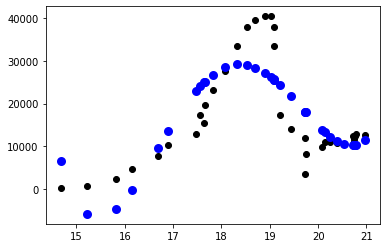

In [16]:
plt.scatter(loan_df['dti'], loan_df['loan_total'], color='black')
plt.scatter(loan_df['dti'], y_pred, color='blue', linewidth=3)

In [17]:
##Tunnning

from sklearn.linear_model import Ridge
from sklearn.pipeline  import make_pipeline

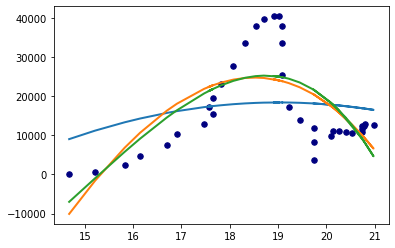

In [20]:
plt.scatter(loan_df['dti'], loan_df['loan_total'], color='navy', s=30, marker='o', label='training points')

for count, degree in enumerate([2,3,4]):
  model = make_pipeline(PolynomialFeatures(degree), Ridge())
  model.fit(loan_df[['dti']], loan_df['loan_total'])
  y_plot = model.predict(loan_df[['dti']])
  plt.plot(loan_df['dti'], y_plot, linewidth=3,label='degree %d' % degree)

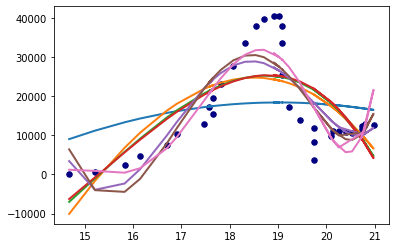

In [22]:
plt.scatter(loan_df['dti'], loan_df['loan_total'], color='navy', s=30, marker='o', label='training points')

colors = ['teal', 'yelowgreen', 'gold']
lw = 2

for count, degree in enumerate([2,3,4,5,6,7,8]):
  model = make_pipeline(PolynomialFeatures(degree), Ridge())
  model.fit(loan_df[['dti']], loan_df['loan_total'])
  y_plot = model.predict(loan_df[['dti']])
  plt.plot(loan_df['dti'], y_plot, linewidth=2,label='degree %d' % degree)